

# Project: Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<p> In this project we'll be analyzing data associated with the movies. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue However, we'll answer 3 questions.</p>

<ul>
<li>Are the number of the movie increase each year?</li>   
<li>Which genres are most popular from year to year?</li>
<li>Did movies with higher vote count received a better rating?</li>
</ul>



 **Library imports**

In [30]:
# Using this cell to set up import statements for all of the packages that are considered to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

 **Loading data**

### General Properties

In [31]:
# Loading the data and having a look at the first few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**First we will be aware of how many columns and rows we have**

In [32]:
# Printing the shape attribute of the dataframe (df)
# will tell us the number of rows and columns (respectively)
df.shape

(10866, 21)

**Here are some summary statistics to understand the dataset a little bit more**

In [33]:
# describe neutral quick statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**To find any missing values in the dataset**

In [34]:
# look at the info of (df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning

**I'll drop unnecessary columns based on my analysis**

In [35]:
# we can drop some columns for readability
df.drop(['id', 'imdb_id', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'cast'], axis=1, 
inplace=True)

In [36]:
# inspect the first 5 instance of a pandas dataframe
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



**Histogram for all data**

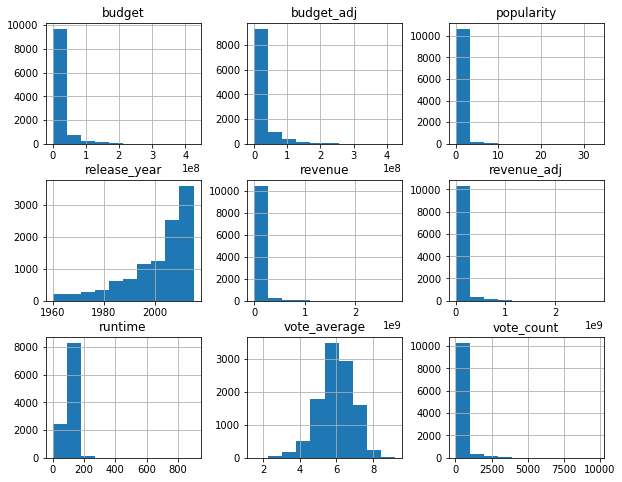

In [37]:
# Histograms
df.hist(figsize=(10, 8));

In [38]:
# look at the info of (df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


**I'll be replaced "0" with nan-Values and will be dropped**

In [39]:
# (0) will be replaced with nan-Values and will be dropped
df['runtime'].replace(0, np.NAN, inplace = True)
df['revenue_adj'].replace(0, np.NAN, inplace = True)
df['revenue'].replace(0, np.NAN, inplace = True)
df['budget_adj'].replace(0, np.NAN, inplace = True)
df['budget'].replace(0, np.NAN, inplace = True)

df.dropna(axis = 0, inplace = True)

**Checking number of duplicates**

In [40]:
# check duplicated entries in columns.
df.duplicated().sum()

1

**For this step I'll use the loc to see the duplicate row and keep = False to show them both**

In [41]:
# to see the duplicate row
df.loc[df.duplicated(keep=False), :]

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,0.59643,30000000.0,967000.0,TEKKEN,92.0,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,0.59643,30000000.0,967000.0,TEKKEN,92.0,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


**Drop the duplicate rows**

In [42]:
# drop the duplicate rows
df.drop_duplicates(inplace=True)

**Checking if it dropped**

In [43]:
# checking if it dropped
df.duplicated().sum()

0

**Deletint some data from the rows with several values**

In [44]:
# deletint some data from the rows with several values
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Adventure,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,Action,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,Action,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Are the number of the movie increase each year?

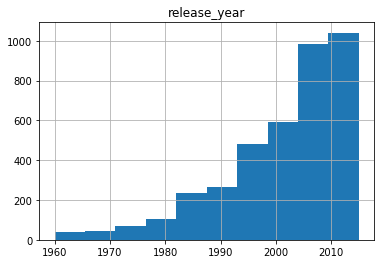

In [45]:
# Plot a single column
df.hist(column='release_year');

> **We can see the number of the movie increases each year**

### Which genres are most popular from year to year?

In [46]:
# function
# groupby one column and return the mean of only particular column in the group
def genres_popularity(value1, value2):
    result = df.groupby([value1])[value2].mean()
    return result
# calling the function
genres_popularity('genres', 'popularity')

genres
Action             1.442326
Adventure          1.905525
Animation          1.712723
Comedy             0.914765
Crime              1.074895
Documentary        0.289461
Drama              0.927571
Family             1.609295
Fantasy            1.581660
History            1.442235
Horror             0.855787
Music              0.914098
Mystery            1.133780
Romance            1.369972
Science Fiction    1.931437
TV Movie           0.273628
Thriller           1.171430
War                1.658497
Western            1.193918
Name: popularity, dtype: float64

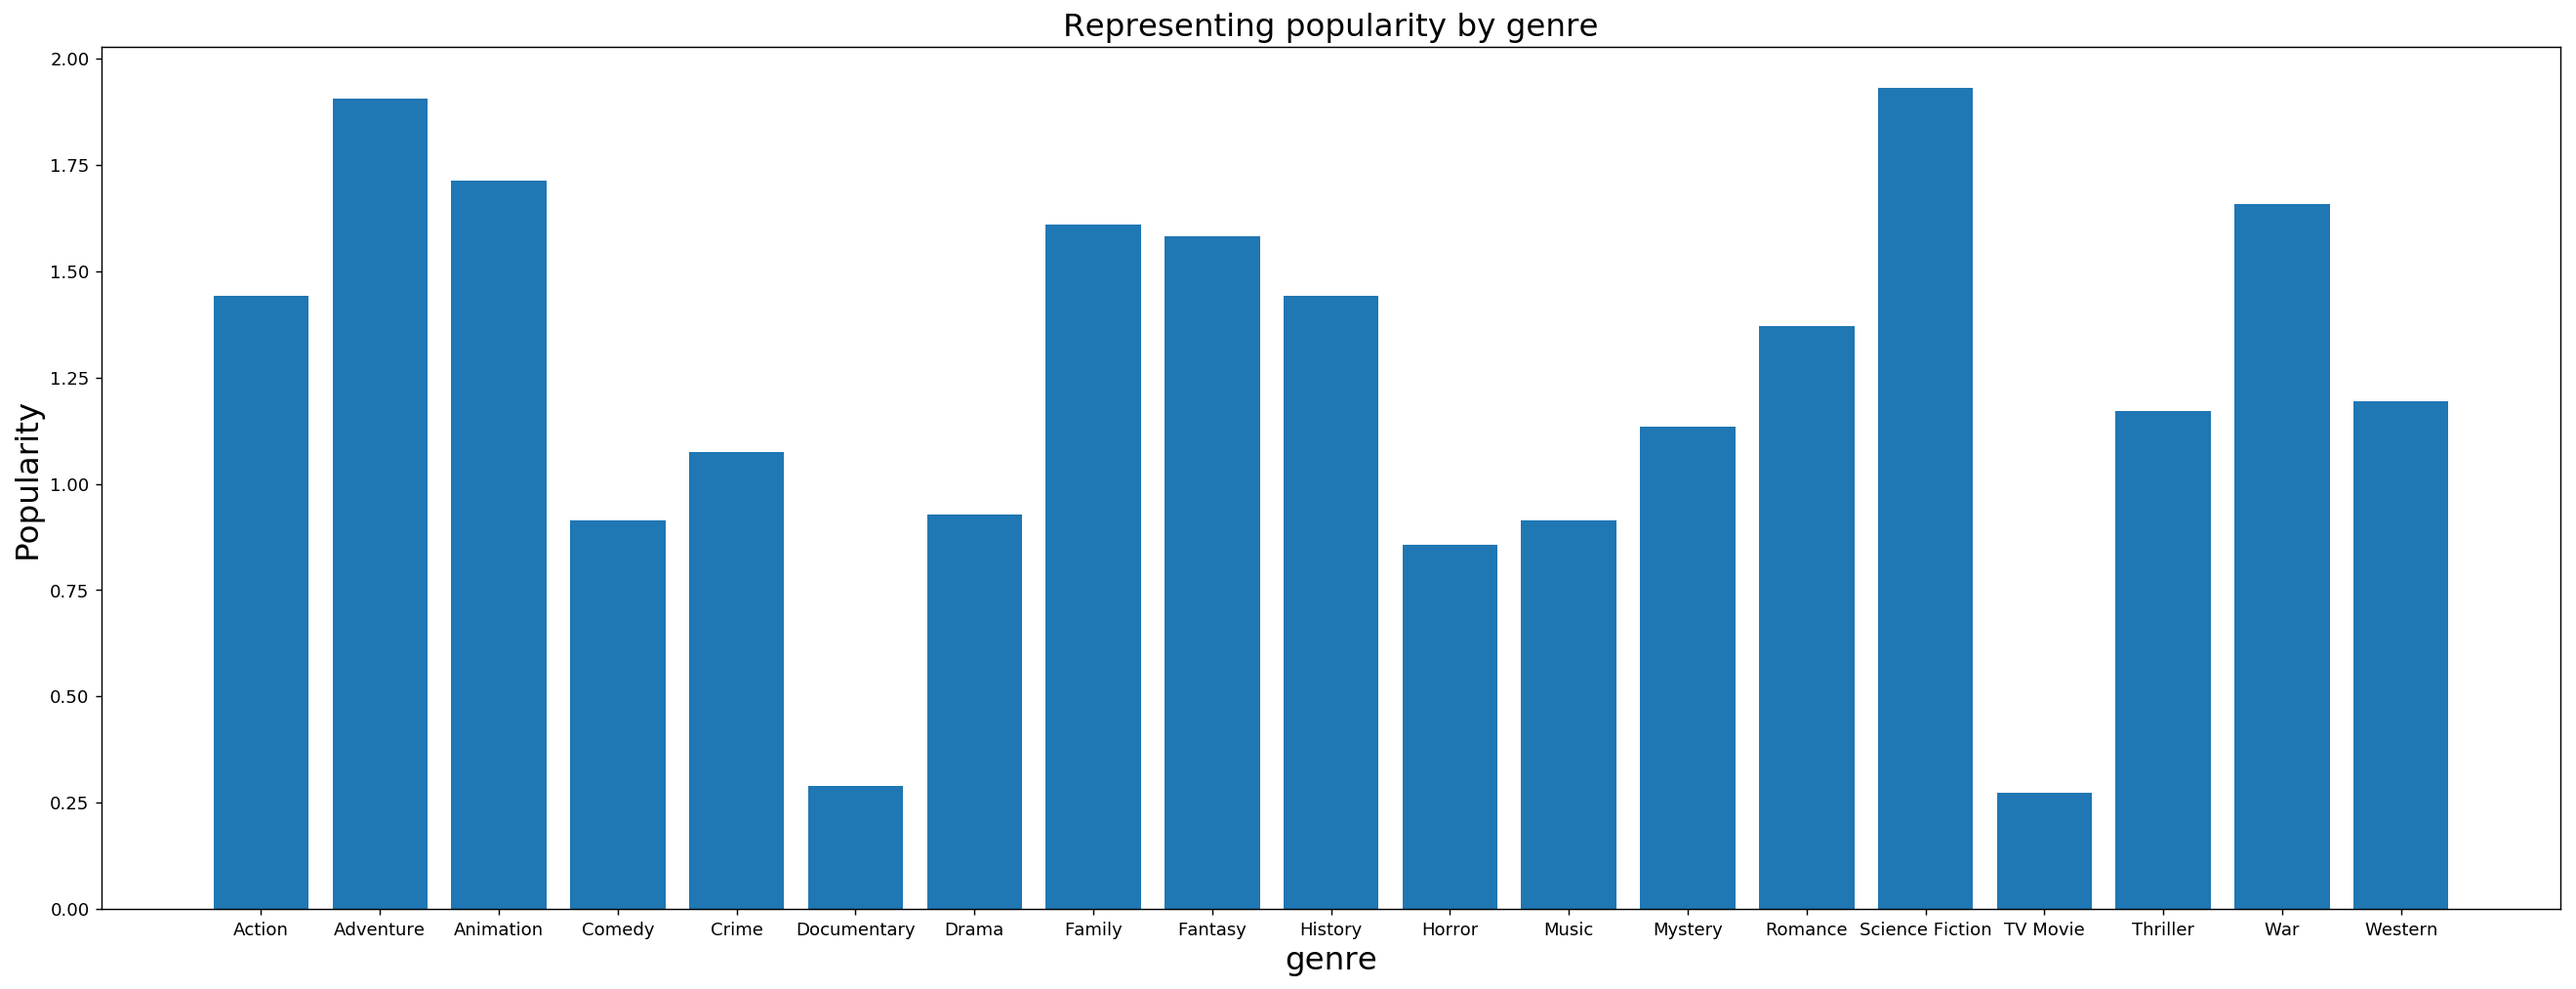

In [47]:
# plotting a histogram of Representing popularity by genre

# giving the figure size(width, height)
plt.figure(figsize=(25, 9), dpi = 130)

# calling above function
plt.bar(genres_popularity('genres', 'popularity').index, genres_popularity('genres', 'popularity'))

# name of the graph
plt.title('Representing popularity by genre', fontsize = 18)

# on x-axis 
plt.xlabel('genre', fontsize = 18)

# on y-axis 
plt.ylabel('Popularity', fontsize = 18);

> **So we can see that Science Fiction movies is the most popular genre**

### Did movies with higher vote count received a better rating?

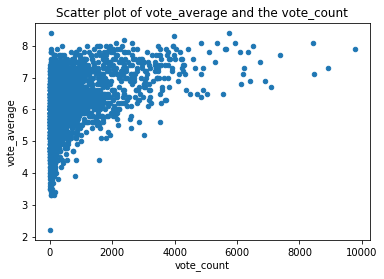

In [48]:
# slice DataFrame to get 2 columns 'vote_count' and 'vote_average'
df_vote = df.loc[:, 'vote_count' : 'vote_average']
df_vote.plot(x='vote_count', y='vote_average', kind='scatter', title='Scatter plot of vote_average and the vote_count');

> **We can see the corralation does not indicate that movies with a higher vote_count receive a higher vote_average**

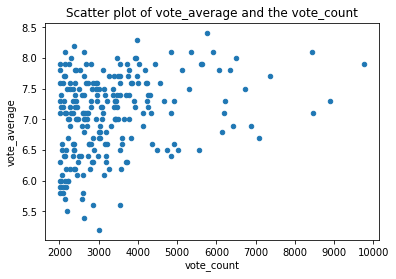

In [49]:
# column with more than 2000 vote_count 
df_2000 = df_vote[df_vote['vote_count'] > 2000]
df_2000.plot(x='vote_count', y='vote_average', kind='scatter', title='Scatter plot of vote_average and the vote_count');

> **Also by considering columns with more than 2000 vote_count does not change the impression**

<a id='conclusions'></a>
## Conclusions

> <p>The first research question shows interesting result, the number of the movie increases each year which gives us that movies field are growing.
> 
> The second research question has shown surprising results, I found that Science Fiction movies is the most popular genre and after Science Fiction came Adventure movies.
> 
> The third research question the corralation does not indicate that higher vote counts result in higher vote averages.</p>





**Limitations:**

> <p>The project is for Udacity.
> 
> The analysis might not be completely error free or right it depends on the way of the analysis. furthermore, we are not sure if the data provided to us is completel corect and up-to-date. Dropping the rows with missing values also affected the overall analysis.</p>

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0